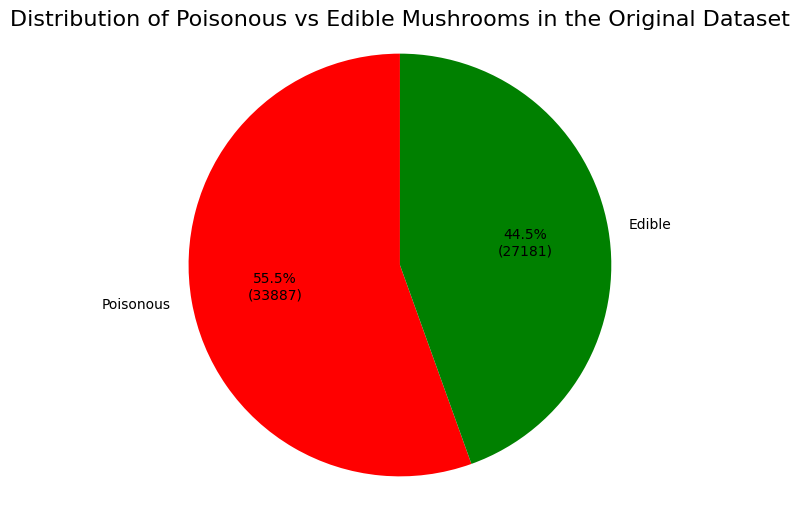

Missing data %: 
 class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64


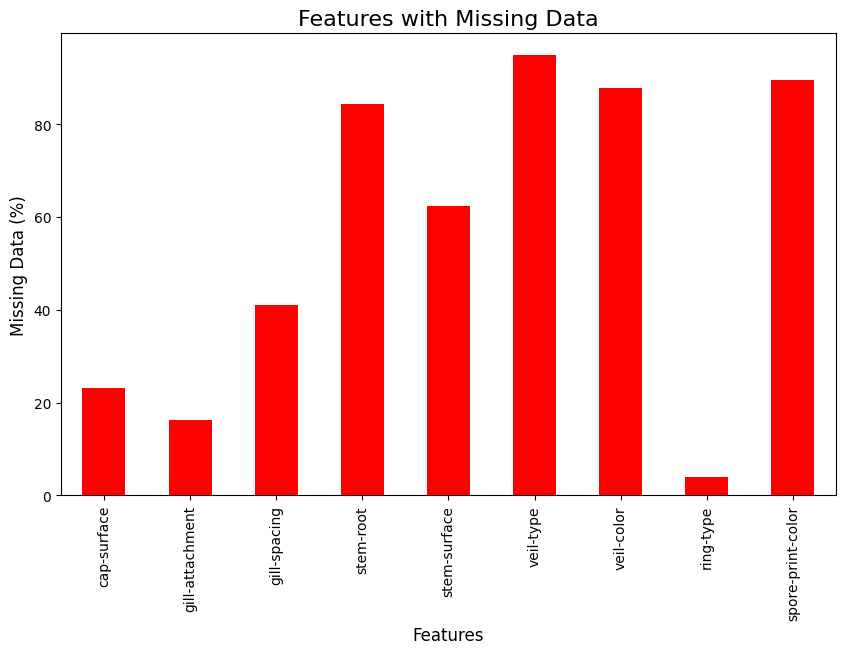

Missing Data Count per Feature:
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load in csv data
original_data = pd.read_csv("MushroomDataset\comma_secondary_data.csv")

# Count of poisonous vs edible in the original dataset
original_class_counts = original_data['class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(original_class_counts, labels=['Poisonous', 'Edible'], 
        autopct=lambda p: f'{p:.1f}%\n({int(p * original_class_counts.sum() / 100)})',
        colors=['red', 'green'], startangle=90)
plt.title("Poisonous vs Edible Mushrooms", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

# Determine how much data is missing from each feature
missing_info = original_data.isnull().sum() / len(original_data) * 100

# Can print to analyze
print ("Missing data %: \n", missing_info)

# Drop below threshold
threshold = 20
features_to_drop = missing_info[missing_info > threshold].index
data_drop_feature = original_data.drop(columns=features_to_drop)


# Plot the missing data percentage for features with missing data above the threshold
features_with_missing = missing_info[missing_info > 0]
plt.figure(figsize=(10, 6))
features_with_missing.plot(kind='bar', color='red')
plt.title(f"Features with Missing Data", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Missing Data (%)", fontsize=12)
plt.xticks(rotation=90)  # Rotate the feature names for better readability
plt.show()

print(f"Missing Data Count per Feature:\n{original_data.isnull().sum()}")


In [19]:
# Search samples for missing or incomplete data
missing_row = data_drop_feature.isnull().sum(axis=1)

# dropping samples with any missing features
rows_to_drop = data_drop_feature[missing_row > 0].index
data_clean = data_drop_feature.drop(index=rows_to_drop)

print("Number of rows with missing data: ", missing_row.sum())
print("Original Data shape: ", original_data.shape)
print("Samples Dropped: " , rows_to_drop.shape)
print("Cleaned Data Shape: ", data_clean.shape)

#data_clean.to_csv("first_cleaning.csv", index=False)

Number of rows with missing data:  12355
Original Data shape:  (61069, 21)
Samples Dropped:  (12002,)
Cleaned Data Shape:  (49067, 14)


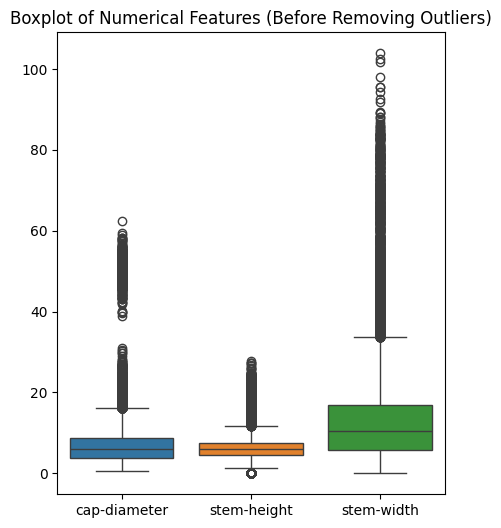

Dropping 2016 outliers in data
New data shape:  (47051, 14)


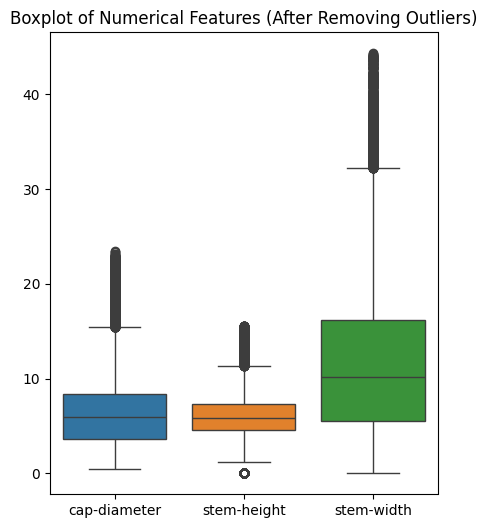

class
1    26264
0    20787
Name: count, dtype: int64


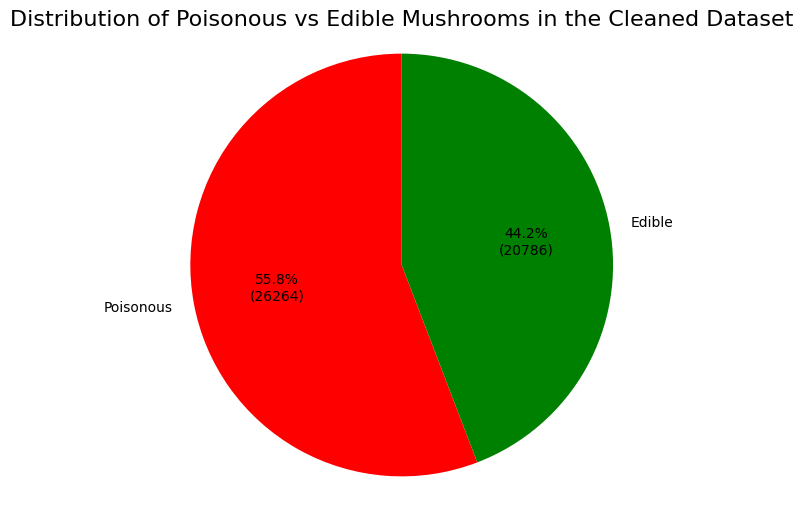

Distribution of does-bruise-or-bleed:
does-bruise-or-bleed
0    37521
1     9530
Name: count, dtype: int64


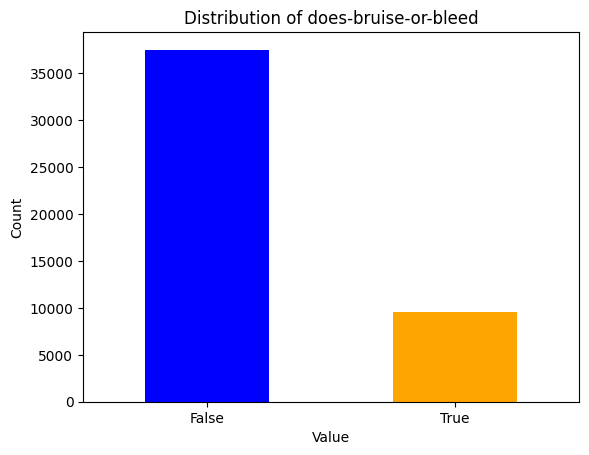

Distribution of has-ring:
has-ring
0    38163
1     8888
Name: count, dtype: int64


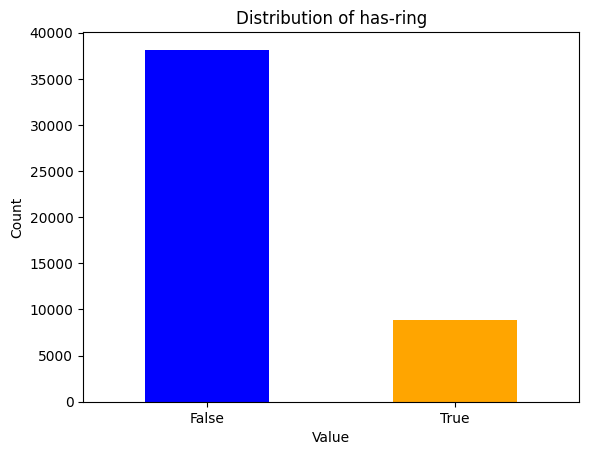

In [20]:
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Dictionary to store encoding keys
encoding_dict = defaultdict(dict)

# Break down the categories
categorical_features = ['cap-shape', 'cap-color', 'gill-attachment', 'gill-color', 'stem-color', 'ring-type', 'habitat', 'season']
numerical_features = ['cap-diameter', 'stem-height', 'stem-width']
boolean_features = ['does-bruise-or-bleed', 'has-ring']
target_class = ['class']

plt.figure(figsize=(5, 6))
sns.boxplot(data=data_clean[numerical_features])
plt.title('Boxplot of Numerical Features (Before Removing Outliers)')
plt.show()

# Drop outliers
z_threshold = 3
z_scores = np.abs(stats.zscore(data_clean[numerical_features]))
outliers = (z_scores > 3).any(axis=1)
print(f'Dropping {outliers.sum()} outliers in data')
data_clean = data_clean[~outliers]
print("New data shape: ", data_clean.shape)

plt.figure(figsize=(5, 6))
sns.boxplot(data=data_clean[numerical_features])
plt.title('Boxplot of Numerical Features (After Removing Outliers)')
plt.show()


# Change target from p / e to 1 / 0
data_clean[target_class[0]] = data_clean[target_class[0]].map({'p':1, 'e':0})

# Print to see split 1 = poisonous 0 = edible
print(data_clean[target_class[0]].value_counts())

plt.figure(figsize=(6, 6))
plt.pie(data_clean[target_class[0]].value_counts(), labels=['Poisonous', 'Edible'], 
        autopct=lambda p: f'{p:.1f}%\n({int(p * data_clean[target_class[0]].value_counts().sum() / 100)})', 
        colors=['red', 'green'], startangle=90)
plt.title("Distribution of Poisonous vs Edible Mushrooms in the Cleaned Dataset", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()
# Convert boolean
for feature in boolean_features:
    data_clean[feature] = data_clean[feature].map({'t': 1, 'f': 0})
    encoding_dict[feature] = {'t': 1, 'f': 0}

for feature in boolean_features:
    print(f"Distribution of {feature}:")
    print(data_clean[feature].value_counts())
    data_clean[feature].value_counts().plot(kind='bar', color=['blue', 'orange'])
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
    plt.show()



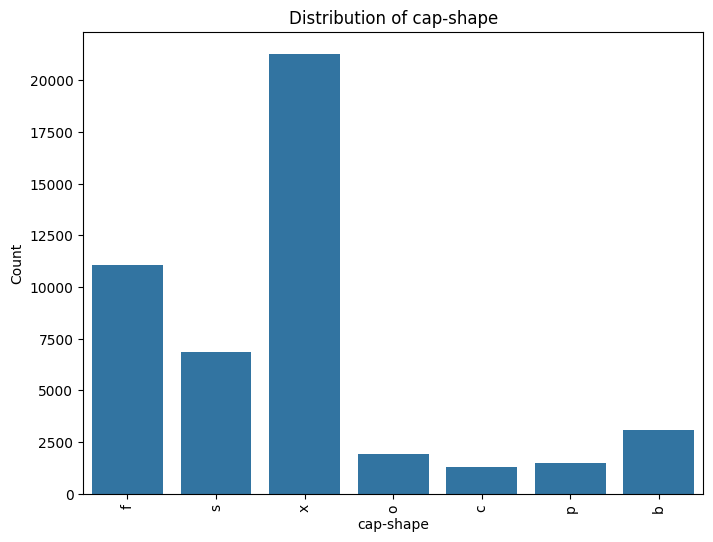

Target Encoding for cap-shape:
b -> 0.7677648578811369
c -> 0.4055299539170507
f -> 0.5529093369418132
o -> 0.9088568486096807
p -> 0.46390374331550804
s -> 0.563129470150343
x -> 0.5128530476056206


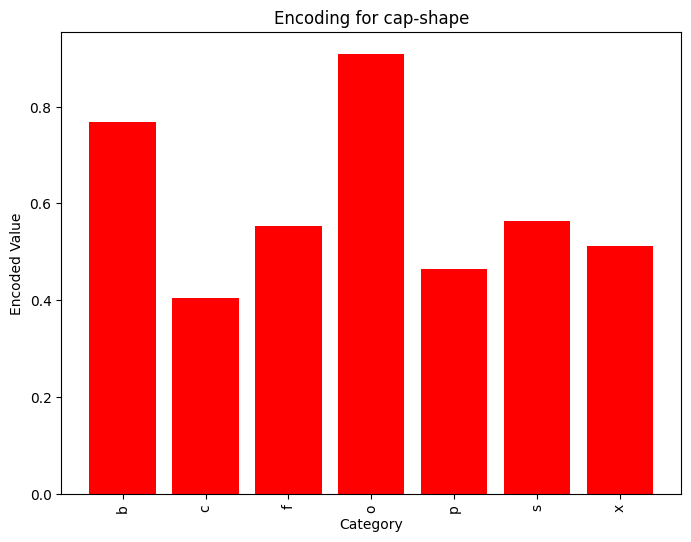

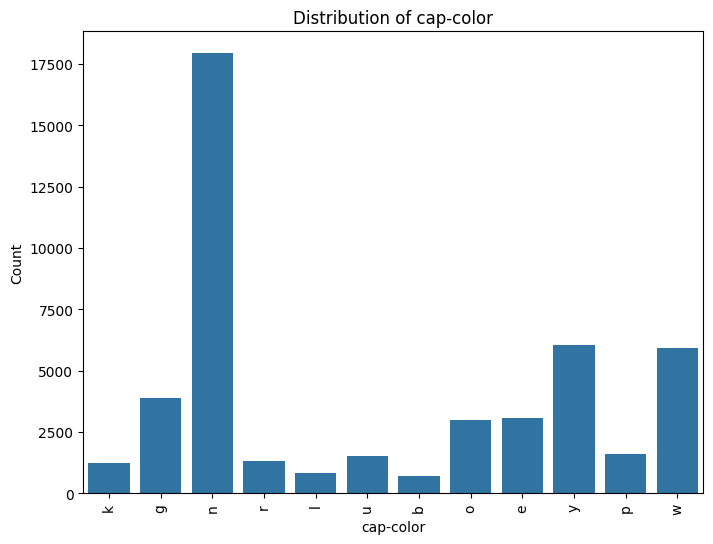

Target Encoding for cap-color:
b -> 0.3704775687409551
e -> 0.8057999348321929
g -> 0.5034713293905888
k -> 0.6003210272873194
l -> 0.45410628019323673
n -> 0.4870879580567795
o -> 0.6692333444928021
p -> 0.7170762444864525
r -> 0.8512396694214877
u -> 0.7120622568093385
w -> 0.5015187310158623
y -> 0.5609027547295055


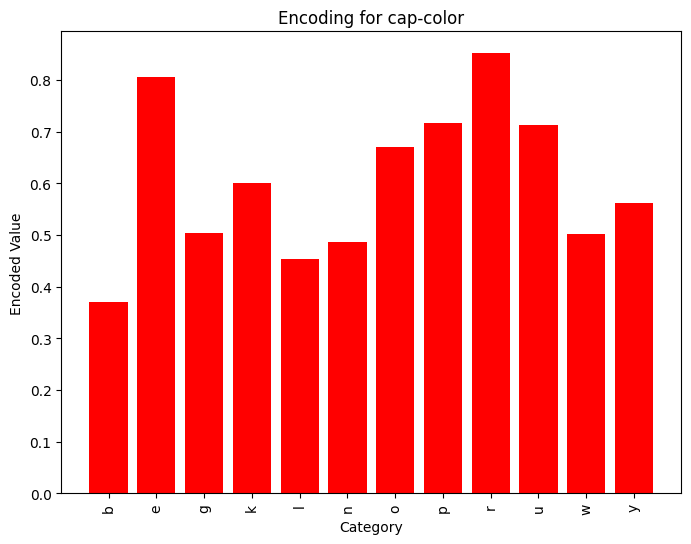

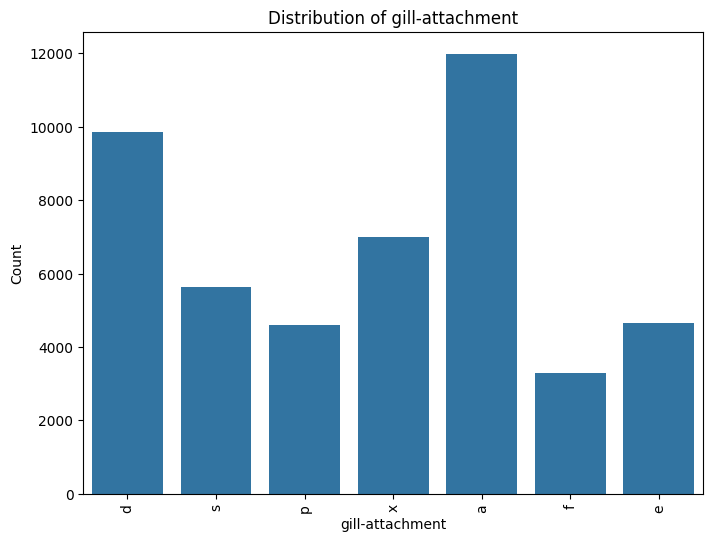

Target Encoding for gill-attachment:
a -> 0.6182015348682015
d -> 0.6056737588652482
e -> 0.3795322892083244
f -> 0.6443565561302099
p -> 0.35706533535923596
s -> 0.5625
x -> 0.5959942775393419


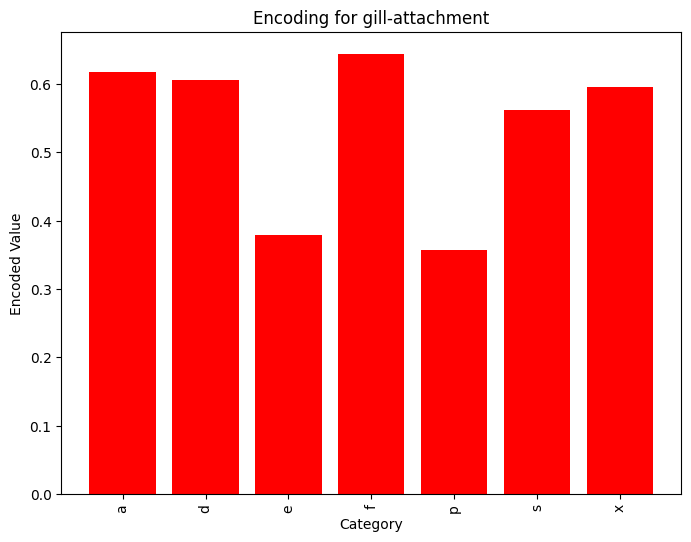

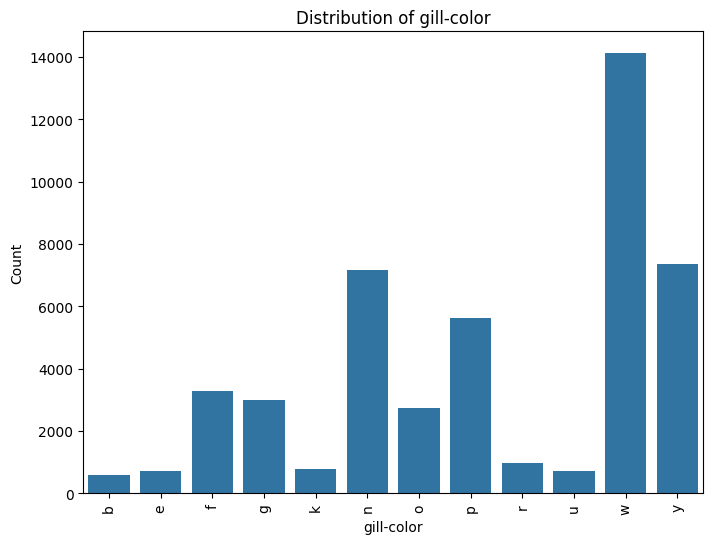

Target Encoding for gill-color:
b -> 0.4059900166389351
e -> 0.6086956521739131
f -> 0.6443565561302099
g -> 0.44835680751173707
k -> 0.6187419768934531
n -> 0.6728084868788387
o -> 0.5523426061493412
p -> 0.5789005515032912
r -> 0.4564994882292733
u -> 0.644808743169399
w -> 0.4843030260080788
y -> 0.5867791077257889


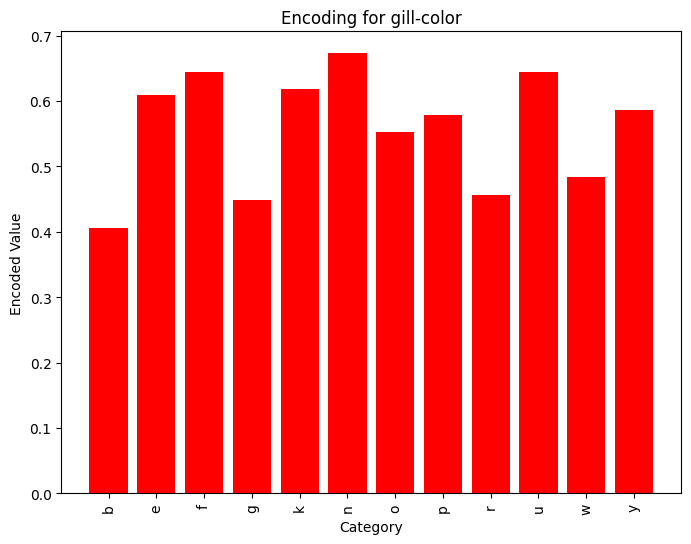

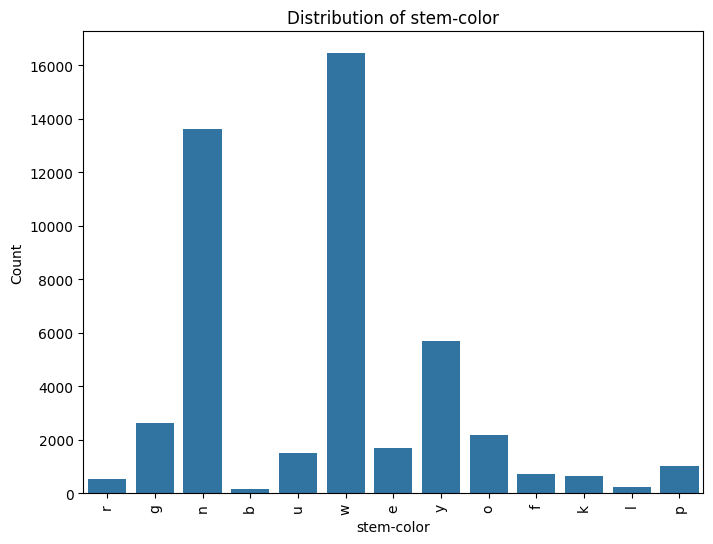

Target Encoding for stem-color:
b -> 0.0
e -> 0.6829699469652327
f -> 1.0
g -> 0.392993145468393
k -> 1.0
l -> 0.5353982300884956
n -> 0.6353416605437179
o -> 0.6075022872827082
p -> 0.871219512195122
r -> 0.7896678966789668
u -> 0.6422818791946309
w -> 0.4140468227424749
y -> 0.6234611326064017


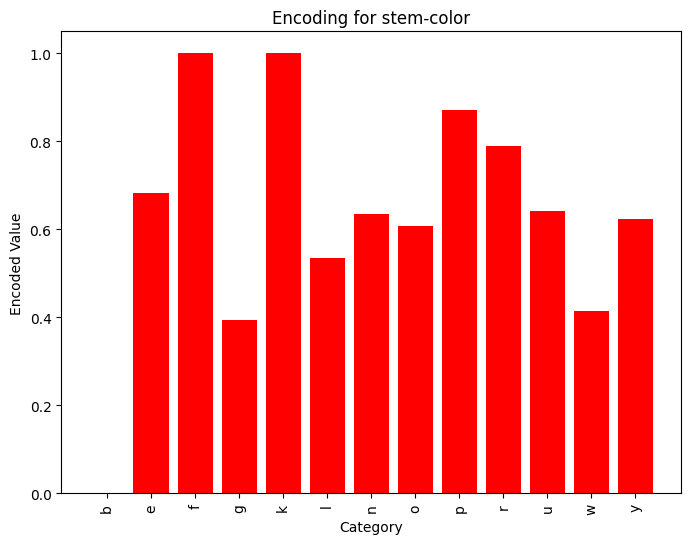

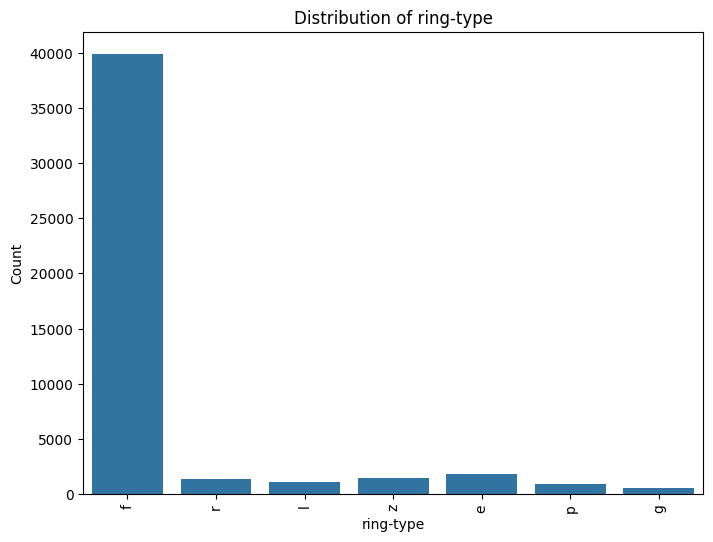

Target Encoding for ring-type:
e -> 0.7657206455203116
f -> 0.5518182728912042
g -> 0.3546617915904936
l -> 0.18342644320297952
p -> 0.39313399778516056
r -> 0.5014388489208633
z -> 1.0


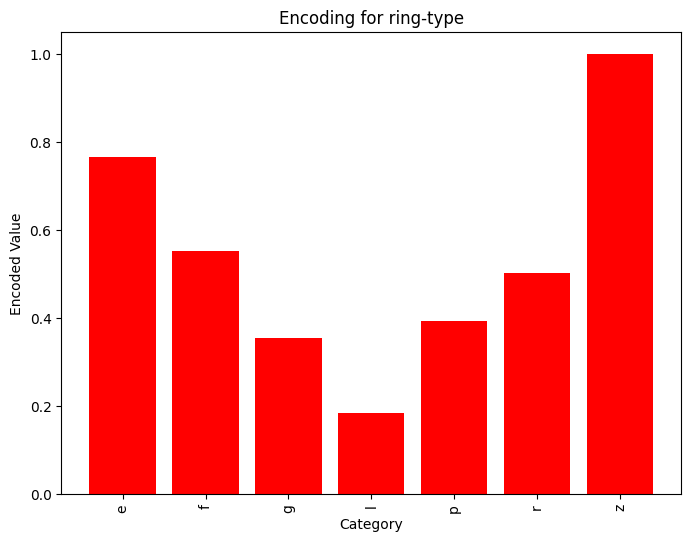

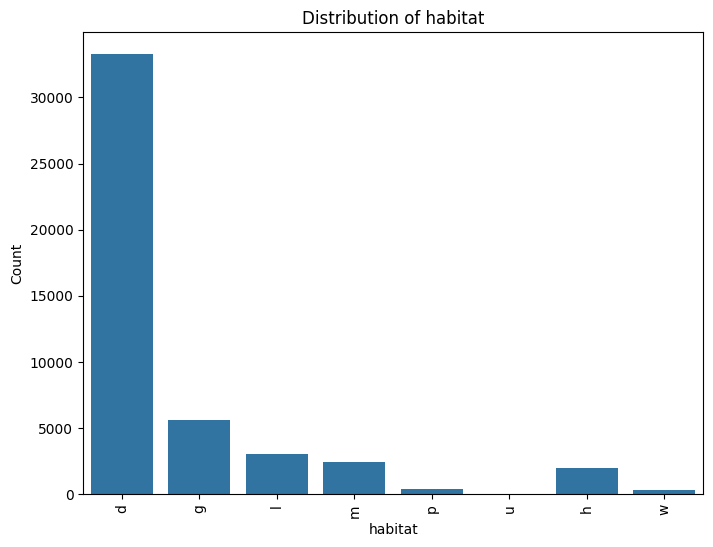

Target Encoding for habitat:
d -> 0.5551981239853286
g -> 0.6667862266857962
h -> 0.6521739130434783
l -> 0.40380827314510837
m -> 0.4874433923425278
p -> 1.0
u -> 0.0
w -> 0.0


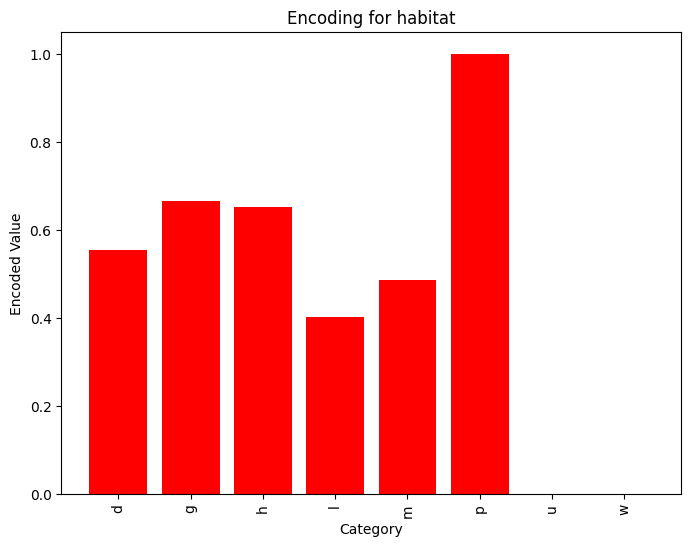

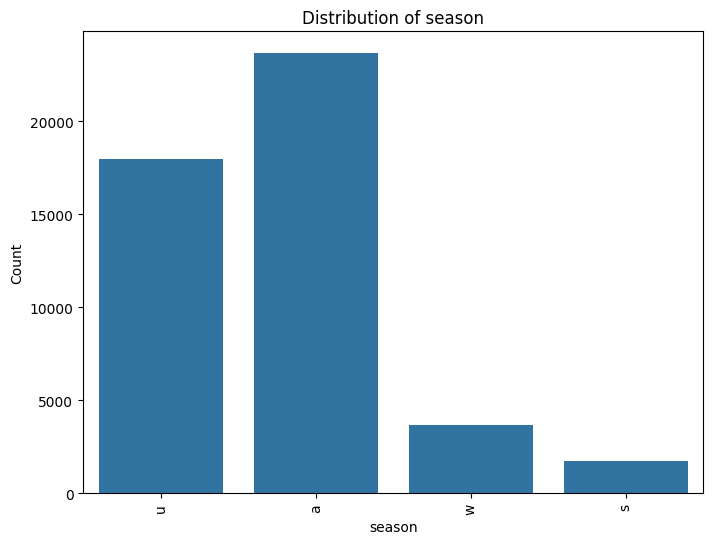

Target Encoding for season:
a -> 0.5709636517328825
s -> 0.4530612244897959
u -> 0.592337207362509
w -> 0.35905767668562144


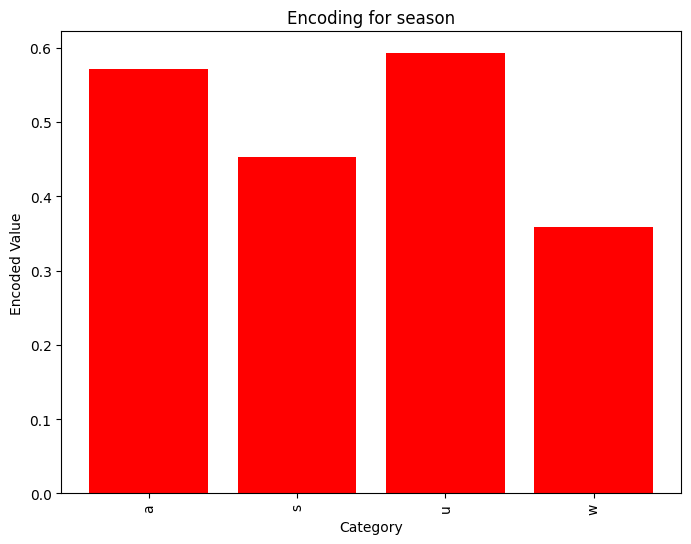

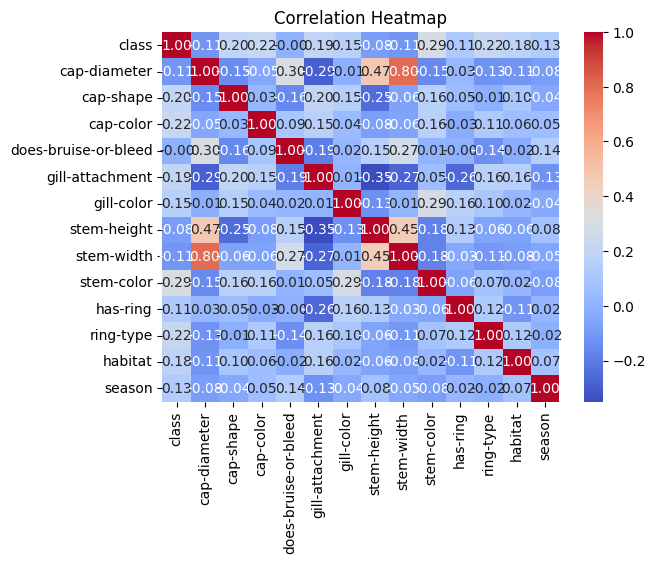

In [ ]:
# Encode categorical features
for feature in categorical_features:
    # Create encoding & store in dictionary
    encoding_map = data_clean.groupby(feature)[target_class[0]].mean()
    encoding_dict[feature] = encoding_map.to_dict()

    # Print the feature encoding (category -> encoded value)
    print(f"Target Encoding for {feature}:")
    for category, encoded_value in encoding_dict[feature].items():
        print(f"{category} -> {encoded_value}")

    # Apply encoding
    data_clean[feature] = data_clean[feature].map(encoding_dict[feature])
    
    encoding_map = encoding_dict[feature]
    plt.figure(figsize=(8, 6))
    plt.bar(encoding_map.keys(), encoding_map.values(), color='red')
    plt.title(f'Encoding for {feature}')
    plt.xlabel('Category')
    plt.ylabel('Encoded Value')
    plt.xticks(rotation=90)
    plt.show()


In [22]:

# Standardize numerical features
scaler = StandardScaler()
scaler.fit(data_clean[numerical_features])
data_clean[numerical_features] = scaler.transform(data_clean[numerical_features])

# Store scaling info & add to dictionary
scaling_info = {}
for i, feature in enumerate(numerical_features):
    scaling_info[feature] = {
         'mean': scaler.mean_[i],
         'std': scaler.scale_[i]
    }
encoding_dict['scaling'] = scaling_info

for feature in numerical_features:
    min = data_clean[feature].min()
    max = data_clean[feature].max()
    print(f"Min: {min} \tMax: {max}")



data_clean.to_csv("clean_mushroom_data.csv", index=False)

Min: -1.6066858441680394 	Max: 4.589122831282251
Min: -2.5254325803810223 	Max: 3.868756393778493
Min: -1.410812605571531 	Max: 3.9286453654100812
